In [1]:
import d3rlpy
import gym

import os
from d3rlpy.algos import DiscreteCQL
from d3rlpy.algos import DiscreteSAC
from d3rlpy.algos import CQL
from d3rlpy.dataset import MDPDataset 
from gym import Env
from gym.spaces import Discrete, Box, Tuple

from expt_utils import get_latest_folder, write_log


In [2]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

from Manipulation_env  import Manipulation_multi_object
from buffer_functions import save_buffer, load_buffer, append_buffer
from get_target import custom_target, clear_region, clear_region_levels, sort_target_to_center, y_inv, hexagon_ring_points

In [3]:
ip_target = custom_target('graphitic_6a_15nm.txt') #target_7a_frame10
#ip_target = clear_region_levels(40, margin = 0.12)
ip_target = sort_target_to_center(ip_target, to_center = True)
print(ip_target.shape)

(37, 2)


In [4]:
notes = "Do only Cu axis movement after move_attempt > 2, target_offset = 0.3"

Functions using tcp commands, provide setpoint in nA !!!
for labview commands provide setpoint in pA

In [18]:
bias_range = [0.01, 0.08]   # (V)
setpoint_range = [10, 90]   # (nA)
speed_range = [0.5, 5]     #(nm/s)

#Default parameters (V, nA, nm/s):
bias = 0.07
setpoint = 1
speed = 5

expt_name = 'multiRL_235_lattice6a_15nm_ddpg_10000epi_10trans'

sxm_basename = 'CO_on_Cu_'

expt_dir = r"E:\Ganesh\Manipulation_expts\routine5"

#ip_target = custom_target('graphitic_6a_15nm.txt') #target_7a_frame10
ip_target = hexagon_ring_points(rings = 3, a = 6*0.23, center = [0.5, 0.5], frame_size = 15)
#ip_target = clear_region_levels(30, margin = 0.1)
print(ip_target.shape)

ip_target = sort_target_to_center(ip_target, to_center = True)  #[0:7, :]

#order = [0, 1, 3, 2, 6, 4, 5]
#ip_target = np.asarray([ip_target[i] for i in order])
#correction_factor = np.asarray([0.88, 0.88])

#ip_target = (np.asarray(ip_target) - np.asarray([0.5, 0.5]))*correction_factor + np.asarray([0.5, 0.5])
print(ip_target.shape)

n_episodes =  10000
n_transitions = 10

drift_comp = False
manipulation_offset = True
continue_to_complete = True

reward_tolerance = 0.011
anchor = (True, 0)
label_margin = 0.0

action_range = np.array([bias_range, setpoint_range, speed_range])
default_action_params = np.array([bias, setpoint, speed])

(37, 2)
(37, 2)


C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\gym\spaces\box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


sxm_file_name: CO_on_Cu_5992.sxm


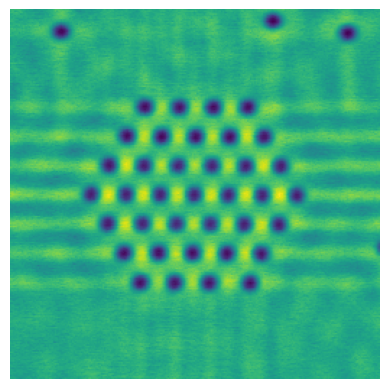

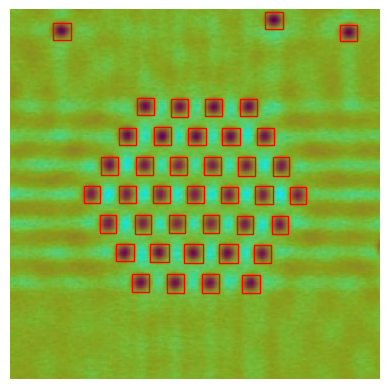

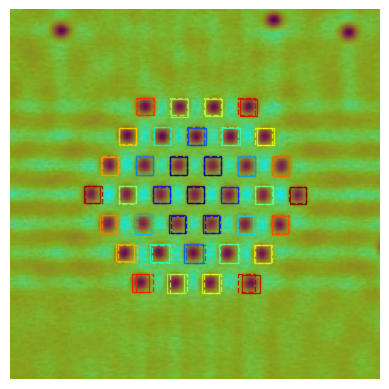

In [19]:
env = Manipulation_multi_object(action_range, default_action_params, expt_name, sxm_basename, expt_dir, X_target = ip_target, n_transitions = n_transitions, continue_to_complete = continue_to_complete, drift_comp = drift_comp, reward_tolerance = reward_tolerance, manipulation_offset = manipulation_offset, anchor = anchor, label_margin = label_margin)




In [20]:
#sac = d3rlpy.algos.SACConfig(gamma = 0.8, critic_learning_rate=0.000001, actor_learning_rate=0.000001).create(device='cpu:0')
#ddpg = d3rlpy.algos.DDPGConfig(gamma = 0.8).create(device='cpu:0')

In [21]:
#model_file = r"C:\Users\Administrator\Py_Scripts_ganesh\manipulation_scripts_2\rl_models\routine5\DDPG_20250115130501_usethis\model_40000.d3"
model_file = r"C:\Users\Administrator\Py_Scripts_ganesh\manipulation_scripts_2\rl_models\routine5\DDPG_20250115133209_use12k\model_12000.d3"
#model_file = r"C:\Users\Administrator\Py_Scripts_ganesh\manipulation_scripts_2\rl_models\routine5\DDPG_20250115120603_use16k\model_16000.d3"
#model_file = r"C:\Users\Administrator\Py_Scripts_ganesh\manipulation_scripts_2\rl_models\oct20_routine4\model_6000.d3"
model = d3rlpy.load_learnable(model_file)

ddpg = d3rlpy.algos.DDPGConfig().create(device='cpu:0')
ddpg.build_with_env(env)
ddpg.copy_q_function_from(model)
ddpg.copy_policy_from(model)


In [22]:
# ddpg = d3rlpy.algos.SACConfig().create(device='cpu:0')
# ddpg.build_with_env(env)
# ddpg.copy_q_function_from(model)
# #ddpg.copy_policy_from(model)


In [23]:
#buffer = d3rlpy.dataset.create_fifo_replay_buffer(limit=buffer_size, env=env)
buffer = d3rlpy.dataset.create_infinite_replay_buffer(env=env)
#buffer = updated_buffer
#explorer = d3rlpy.algos.explorers.LinearDecayEpsilonGreedy(start_epsilon= 1.0, duration = 1000, end_epsilon = 0.20)


2025-01-23 19:24.22 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2025-01-23 19:24.22 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2025-01-23 19:24.22 [info     ] Action size has been automatically determined. action_size=3


In [24]:
explorer = d3rlpy.algos.explorers.LinearDecayEpsilonGreedy(start_epsilon= 0.002, duration = 50, end_epsilon = 0.001)

Iteration:   45
Action params: Bias = 0.014 V,	Setpoint = 86.64 nA,	speed = 4.86 nm/s
Reward: 3700, 	norm_displacement: 0.004763641721975578


Current iteration:   46
start new session:  True
Action params: Bias = 0.015 V,	Setpoint = 85.39 nA,	speed = 4.80 nm/s 

Molecule index: 7
Action::  [[   -0.85778     0.88468     0.91218]]
Rescaled_action:  [   0.014978      85.387      4.8024]
Info: stuck:False	move_attempt:0	disp:0.1828969177214313
d_space_prev 0.0007163693181593249
Initial_coords:[[ 3.8876e-07  5.5168e-07]]	Final_coords: [[ 3.8862e-07  5.5189e-07]],	 drift: [   0.002952    0.004154],	 Angle: 145.15196348438513
default_params: [       0.07           1           5]

Target reached !!!

sxm_file_name: CO_on_Cu_5994.sxm


Exception ignored in: Exception ignored in sys.unraisablehook: <built-in function unraisablehook>
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\colorama\ansitowin32.py", line 47, in write
    self.__convertor.write(text)
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\colorama\ansitowin32.py", line 177, in write
    self.write_and_convert(text)
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\colorama\ansitowin32.py", line 205, in write_and_convert
    self.write_plain_text(text, cursor, len(text))
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\colorama\ansitowin32.py", line 210, in write_plain_text
    self.wrapped.write(text[start:end])
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\colorama\ansitowin32.py", line 47, in write
    self.__convertor.write(text)
  File "C:\Users\Administrator\AppData\Ro

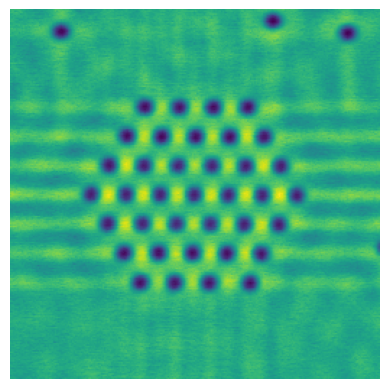

Error in callback <function flush_figures at 0x0000023DB7D9E440> (for post_execute), with arguments args (),kwargs {}:


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000023DCDB4B190>>
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 788, in _clean_thread_parent_frames
    if phase != "start":
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x0000023DCDB4B190>>
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 788, in _clean_thread_parent_frames
    if phase != "start":
KeyboardInterrupt: 


KeyboardInterrupt: 

In [25]:
ddpg.fit_online(
        env,
        buffer = buffer,
        explorer = explorer,

        n_steps = n_transitions*n_episodes,
        n_steps_per_epoch = n_transitions,

        #intial random steps for exploraion
        #random_steps = 100,
    )

In [ ]:
episodes = buffer.episodes
print(len(episodes[0]))

# Save data

In [26]:
rl_dir = os.path.join('.', 'd3rlpy_logs')
latest_folder = get_latest_folder(rl_dir)
print(latest_folder)

write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'bias_range (V)', str(bias_range)) 
write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'setpoint_range (nA)', str(setpoint_range)) 
write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'speed_range (nm/s)', str(speed_range))
write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'reward_tolerance', str(reward_tolerance)) 
#write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'lattice_correction_factor', str(correction_factor)) 
write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'label_margin', str(label_margin)) 


write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'rl_dir:', latest_folder) 
write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'base_model_file:', model_file) 

write_log(os.path.join(expt_dir, 'expt_log',expt_name, 'settings.txt'), 'notes:', notes) 


#Save buffer
buffer_name = expt_name + "dataset.h5"

buffer_path = os.path.join(expt_dir, 'expt_log', expt_name, buffer_name)

save_buffer(buffer, buffer_path)


#Save model
model_name = "model.d3"
model_path = os.path.join(expt_dir, 'expt_log', expt_name, model_name)
ddpg.save(model_path)


DDPG_online_20250123192424


# Buffer

In [13]:
buffer =  d3rlpy.dataset.create_infinite_replay_buffer(env = env)
old_buffer =  r"E:\Ganesh\Manipulation_expts\routine2\expt_log\RL_sac_100epi_5trans_28\valid_50epis_only.h5"
old_buffer = load_buffer(old_buffer)

2024-10-22 12:38.45 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[[1]])
2024-10-22 12:38.46 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2024-10-22 12:38.46 [info     ] Action size has been automatically determined. action_size=3
2024-10-22 12:38.46 [info     ] Signatures have been automatically determined. action_signature=Signature(dtype=[dtype('float32')], shape=[(3,)]) observation_signature=Signature(dtype=[dtype('float32')], shape=[(5,)]) reward_signature=Signature(dtype=[dtype('float32')], shape=[(1,)])
2024-10-22 12:38.46 [info     ] Action-space has been automatically determined. action_space=<ActionSpace.CONTINUOUS: 1>
2024-10-22 12:38.46 [info     ] Action size has been automatically determined. action_size=3


In [14]:
updated_buffer = append_buffer(buffer, old_buffer)

In [8]:
len(updated_buffer.episodes)

50